**BLEU-Score**

* **Вспомните, как считается BLEU и опишите своими словами форумулу расчета и интерпретацию результатов.**

Принцип работы: при высчитывании BLEU-Score кандидат (машинный перевод) сравнивается с референсом (эталонным, идеальным человеческим переводом).

Формула подсчета состоит из двух частей:
1) Brevity penalty = штраф за краткость, который "наказывает" слишком короткие машинные переводы по сравнению с длиной предложения-референса
2) N-Gram Overlap = n-граммовое перекрытие, которое подсчитывает, сколько униграмм, биграмм, триграмм и четырехграмм в кандидатах соответствует их n-граммному аналогу в эталонных переводах (референсах)

Алгоритм:
1) Подсчет встречаемости каждой униграммы в референсе и кандидате
2) Перед вычислением оценки все предложения токенизируются, нормализуются (регуляризуются)
3) Подсчитывается точность n-грамм для, например, двух кандидатов
5) Вычисляется штраф за краткость
6) Подсчитывается сам BLUE-Score

* **Ответьте на следующие вопросы:**

**1) Что значит кандидат и референс?**

Кандидат - это перевод, сделанный машиной.
Референс - это эталонный перевод, сделанный человеком.

**2) Для чего подойдет BLEU-Score: подсчета отдельных переводов или результатов работы системы на целом корпусе?**

BLUE-Score подойдет для подсчета результата работы системы на целом корпусе, так как эта метрика нерепрезентативна, если необходимо оценить качество перевода отдельных предложений.

**3) Какие "скоры" считаются высокими, а какие - низкими?**

Результат подсчета - число от 0 до 1. Чем ближе число к единице, тем перевод лучше. Значение 0 означает, что качество перевода низкое, плохое, единица же означает идеальный перевод (однако важно понимать, что единицы не достигают даже переводчики-люди).

AutoML отражает оценку в процентах, а не в десятичных дробях. Здесь можно пользоваться следующей таблицей для оценки хорошего и плохого перевода:

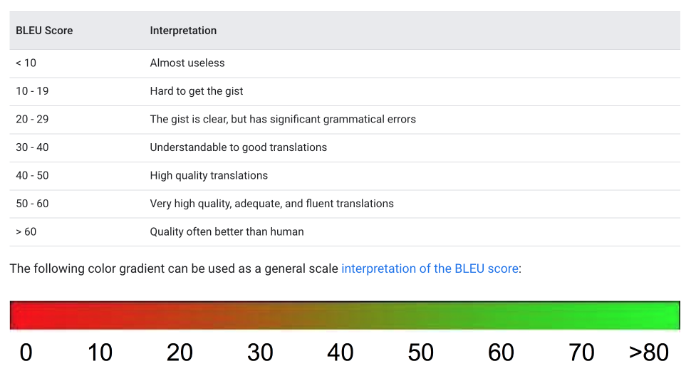

Т.е. процент от 30 считается приемлемым и понимаемым, от 40 - хорошим.

* **Проанализируйте результаты в ячейках ниже. Порассуждайте:**

  * **На ваш взгляд, какие слова, контексты вызвали трудности у автоматической системы?**
  * **Руководствуясь знаниями о том, как работают нейросети, предположите, что вызвало ошибки.**

In [ ]:
!pip3 install evaluate

In [4]:
import evaluate

predictions = [
    "In addition to the usual hockey, there is an underwater and even ice version of this game.", #  Помимо обычного хоккея, существует подводная и даже подлёдная разновидности этой игры.
    "You reap what you sow.", # Что посеешь - то и пожнешь.
    "Also, justice is how we distribute the small resources." # Также, справедливость - это и то, как мы распределяем малые ресурсы.
    ]

references = [
    ["In addition to conventional hockey, there is an underwater and even under-ice variety of this game."], #  Помимо обычного хоккея, существует подводная и даже подлёдная разновидности этой игры.
    ["What goes around comes around."], # Что посеешь - то и пожнешь.
    ["Fairness also has to do with how we distribute scarce resources."], # Также, справедливость - это и то, как мы распределяем малые ресурсы.
    ]

bleu = evaluate.load("bleu")
results = bleu.compute(predictions=predictions, references=references)

print(results)

{'bleu': 0.374360558192794, 'precisions': [0.5833333333333334, 0.45454545454545453, 0.3333333333333333, 0.2222222222222222], 'brevity_penalty': 1.0, 'length_ratio': 1.0, 'translation_length': 36, 'reference_length': 36}


В первом предложении сложность могло вызвать сочетание "underwater and even under-ice variety", а именно слово "under-ice", которое легче понять именно в контексте, т.к. оно составлено по аналогии с "underwater". В переводах также есть синонимы ("usual/conventional", "version/variety"), при этом кажется, слово "conventional" - конвенциональный, соответствующий традициям/стандартный - в данном контексте лучше отражает "традиционный, обычный хоккей" (по сравнению с "usual"). Однако эти тонкие отличия машине уловить сложно (вероятно, в силу того, что она не была обучена на тех примерах, где использование этих слов в разных контекстах имело бы значение).

Во втором предложении сложность у системы вызвала пословица (You reap what you sow/What goes around comes around).

В третьем случае могла повлиять грамматическая конструкция "have to do with" ("have to" - модальный, "do with" - фразовый глагол), а также иной порядок слов. В переводах также встречаются синонимы, например, "fairness" и "justice". Они могут употребляться в одинаковых контекстах, но есть небольшое отличие (обычно "justice" - это скорее понятие, которое относится к правовой сфере (хоть и необязательно, но оно более связано с разными законами, правилами), а "fairness" - более глобальное и базовое понятие, относящееся к сфере морали, добра и зла в целом). Также "scarce" и "small": первое слово в большей степени передает значение "дефицитный, скудный, недостаточный".  Опять же, такие детали могут быть различимы человеком, но оказаться невидимыми для машины. 

Почему так могло получиться? Возможно, обучение прошло на недостаточном количестве данных. Также обучение могло проходить на данных, которые содержат подобные слова и контексты.